<a href="https://colab.research.google.com/github/Bayrem-ben/colab.github.io/blob/master/NLP_Shakespeare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2021-07-02 02:00:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 172.217.164.176, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-07-02 02:00:27 (112 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [12]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences = True))) # An LSTM Layer)
model.add(Dropout(0.2)) # A dropout layer)
model.add(LSTM(100)) # Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l1(0.001))) # A Dense Layer including regularizers/ kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax')) # A Dense Layer)
# Pick an optimizer
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) # Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_8 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_9 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 9s 12ms/step - loss: 7.1461 - accuracy: 0.0218
Epoch 2/100
484/484 [==============================] - 6s 12ms/step - loss: 6.7196 - accuracy: 0.0233
Epoch 3/100
484/484 [==============================] - 6s 12ms/step - loss: 6.6892 - accuracy: 0.0264
Epoch 4/100
484/484 [==============================] - 6s 12ms/step - loss: 6.5986 - accuracy: 0.0259
Epoch 5/100
484/484 [==============================] - 6s 11ms/step - loss: 6.5339 - accuracy: 0.0296
Epoch 6/100
484/484 [==============================] - 6s 11ms/step - loss: 6.4890 - accuracy: 0.0323
Epoch 7/100
484/484 [==============================] - 6s 12ms/step - loss: 6.4688 - accuracy: 0.0322
Epoch 8/100
484/484 [==============================] - 6s 11ms/step - loss: 6.4551 - accuracy: 0.0327
Epoch 9/100
484/484 [==============================] - 6s 11ms/step - loss: 6.4309 - accuracy: 0.0344
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 6.403

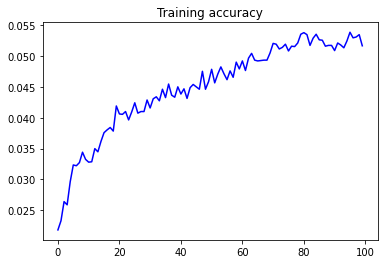

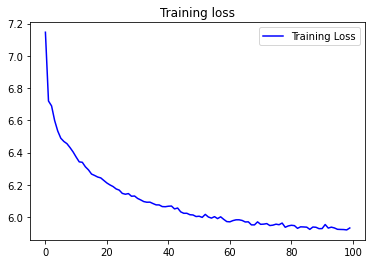

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [15]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope to in the world to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am to i i am
